# Open Data Project Presentation 📺
Name:  Tan Zhi Yi

ziD:   z5441085

Topic: AirBnBs in Tasmania, Australia

# Data Collection 🔍
What is this dataset about? This dataset is an excel file that encompasses various aspects, such as the number of listings, their locations, prices, availability, and host information of the Airbnb rental homes in Tasmania. 

It was downloaded through 'Inside Airbnb' and consists of 5577 rows and 18 columns in the categorical dataset. The dataset collects data on Airbnb listings, including information such as the location of the listings, host profiles, pricing, availability, and other details. 

The data was collected through scraping, which involves automatically extracting information from web pages and storing it in a structured format for analysis.

# Analysis Topics 💡
The goal of this open data project is to analyse the relationship between the multiple aspects of an AirBnB in Tasmania and how it affects their prices. Below are the topic questions that will be answered in this presentation:
1. How does the room type affect the price of AirBnB listing?
2. Which Tasmanian suburbs has the most number of AirBnB listings? Will the location of the listing affect its price?
3. Does the number of reviews affect the price of an AirBnb?

Lets start by importing the appropriate files.

In [755]:
# use command 'python3 -m notebook'
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

Now that we have downloaded the appropriate files, we can read and download the excel file.

In [756]:
%matplotlib inline
penalty_data = pd.read_excel("TAS AirBnb.xlsx")

The number of columns and rows of the dataset are obtained as below:

In [757]:
print(f"Total Number of Listings: {len(penalty_data)}")
print(f"Total Number of Categories: {penalty_data.shape[1]}")

Total Number of Listings: 5577
Total Number of Categories: 18


# Problem 1 🏠
How does the room type affect the price of AirBnB listings?

We can plot a bar chart that displays the total number of listings in Tasmania for each room type, along with a line graph to display the average cost of listing per night for that respective room type to investigate the relationship between each other.

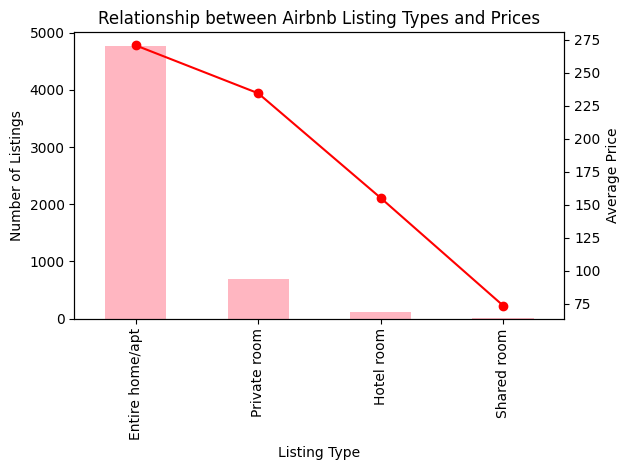

In [758]:
# Bar Chart
upper_bound = 5000
bar_chart = penalty_data.room_type.value_counts()
bar_chart[bar_chart < upper_bound].plot(kind="bar", color="lightpink")

# Labels
plt.title('Relationship between Airbnb Listing Types and Prices')
plt.xlabel('Listing Type')
plt.ylabel('Number of Listings')
ax2 = plt.gca().twinx()
ax2.set_ylabel('Average Price')

# Line Graph
grouped_data = penalty_data.groupby('room_type')['price'].mean().reset_index()
ax2.plot(grouped_data['room_type'], grouped_data['price'], marker='o', color='red')

# Show graph
plt.tight_layout()
plt.show()

Based on the bar chart, it is evident that the most favored type of listings are entire home/apartment, while shared room listings stand as the least favored. Consequently, the average price of entire home/apartment costs the most while shared rooms cost the least. Thus, we can conclude that the listing type affects the price of AirBnBs in Tasmania.

# Problem 2 🌏
Does the location of listing affect the price?

Here we can plot the listings on a map of data points to see which area is most concentrated, i.e. has the most number of listings.

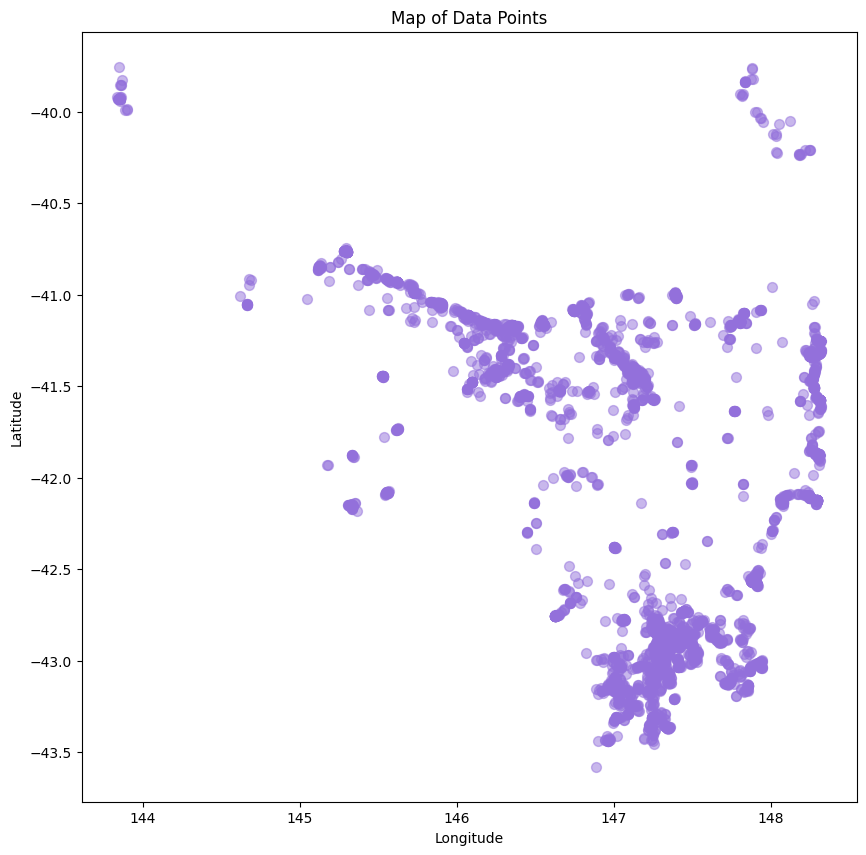

In [759]:
plt.figure(figsize=(10, 10))
plt.scatter(penalty_data['longitude'], penalty_data['latitude'], marker='o', s=50, alpha=0.5, c='mediumpurple', zorder=2)
plt.title('Map of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

By observing the data point map above, we can observe that northern and southern Tasmania have a higher number of AirBnB listings as they are more dense. We can also obtained a detailed summary of suburbs and their prices by plotting a bar chart of number of listings in each suburb against their average nightly price.

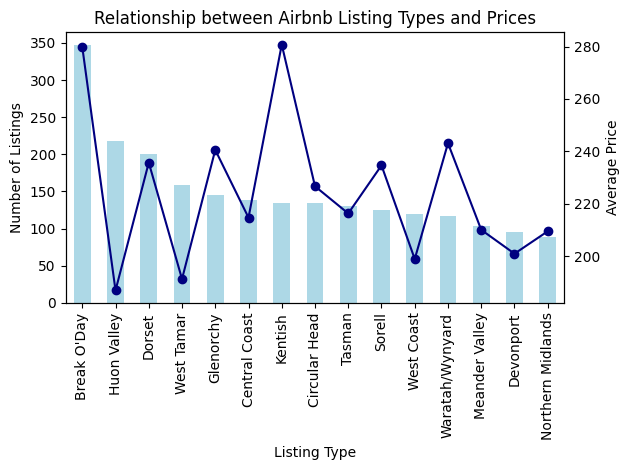

In [769]:
# Bar Chart
neighbourhood_sum = penalty_data.neighbourhood.value_counts()
neighbourhood_sum = neighbourhood_sum[5:20]
neighbourhood_sum.plot(kind="bar", color="lightblue")

# Labels
plt.title('Relationship between Location of AirBnb and Prices')
plt.xlabel('Suburb')
plt.ylabel('Number of Listings')
ax2 = plt.gca().twinx()
ax2.set_ylabel('Average Price')

# Line Graph
grouped_data = penalty_data.groupby('neighbourhood')['price'].mean().reset_index()
grouped_data = grouped_data[grouped_data['neighbourhood'].isin(neighbourhood_sum.index)]
plt.plot(grouped_data['neighbourhood'], grouped_data['price'], marker='o', color='navy')

# Show graph
plt.tight_layout()
plt.show()

In the graph above, I used the 'slice' method to obtained the top 5 to 20 most popular suburbs and their average prices. As we can see, the average price of suburbs varies and the location of AirBnb does in fact affect the average nightly price. For example, although Huon Valley has a large number of listings but its average night price is the lowest amongst others.

# Problem 3 🛌

Does the number of reviews affect the price of an AirBnb?

Let's plot a graph of the number of reviews against the average nightly price of an AirBnB to investigate if there is any relation between them.

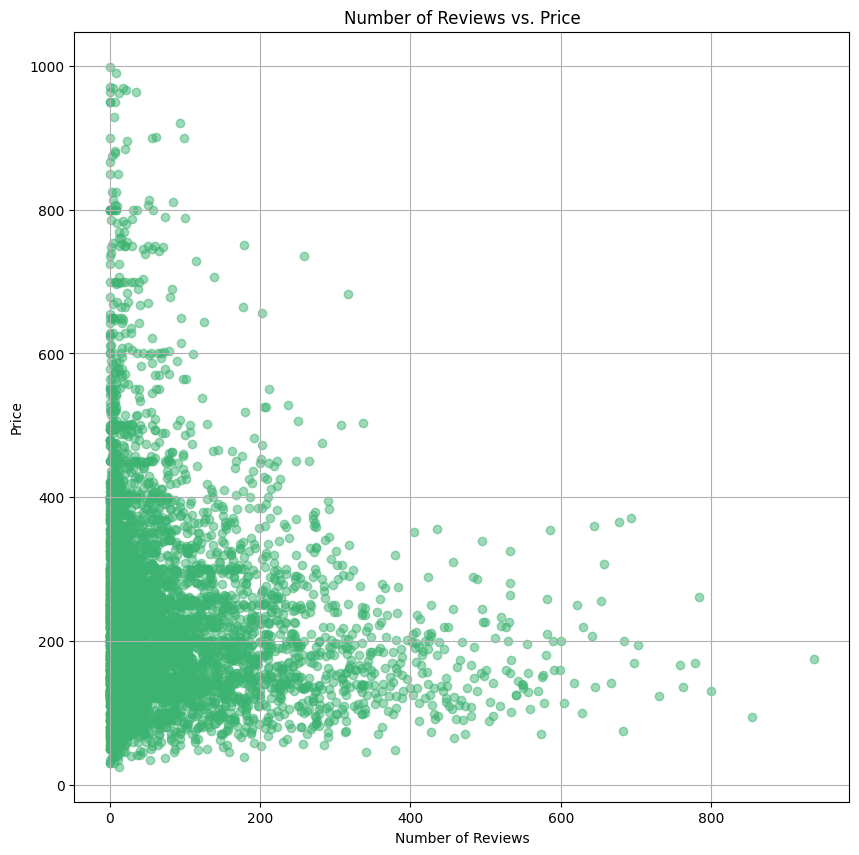

In [821]:
filtered_price = penalty_data[penalty_data['price'] < 1000]

plt.figure(figsize=(10, 10))
plt.scatter(filtered_price['number_of_reviews'], filtered_price['price'], c='mediumseagreen', alpha=0.5)
plt.ylabel('Price')
plt.xlabel('Number of Reviews')
plt.title('Number of Reviews vs. Price')
plt.grid(True)
plt.show()

From the scatterplot above, we can observe that the number of reviews do not necessarily affect the price of an AirBnB. For example, the listing with the highest number of reviews (in bottom right) only has a nightly price of less than $200. This may be because a high number of reviews may indicate that the listing is old. On the other hand, there are multiple listings that have little to no reviews yet priced in the higher end range. Therefore, the number of reviews of an AirBnB does not highly affect its listing price.

# Conclusion 🛫

There are many aspects that affect the price of AirBnBs not just in Tasmania but around the world. Thus, we must consider the importance of the aspects and decide on an accommodation that suits our needs the most.

# Thank You! 😚